In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# 1) Load dataset
df = pd.read_csv("/content/drive/MyDrive/Task 3/Linear regression on advertising dataset/advertising.csv")
print("Raw Data Shape:", df.shape)
print(df.head())

Raw Data Shape: (200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
# 2) Clean data
print("\nMissing Values:\n", df.isnull().sum())
df = df.drop_duplicates().dropna()

print("\nCleaned Shape:", df.shape)


Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Cleaned Shape: (200, 4)


In [4]:
# 3) Split features and labels
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [5]:
# 4) Encode categorical columns (none here, but keeping structure)
cat_cols = X.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [6]:
# 5) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 6) Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# 7) Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# 8) Predict + Evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE: {mse:.4f}    R² Score: {r2:.4f}")


MSE: 2.9078    R² Score: 0.9059


In [10]:
# 9) Results Table
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results['Error'] = results['Actual'] - results['Predicted']
print("\nActual vs Predicted:\n", results.head())


Actual vs Predicted:
    Actual  Predicted     Error
0    16.9  17.034772 -0.134772
1    22.4  20.409740  1.990260
2    21.4  23.723989 -2.323989
3     7.3   9.272785 -1.972785
4    24.7  21.682719  3.017281


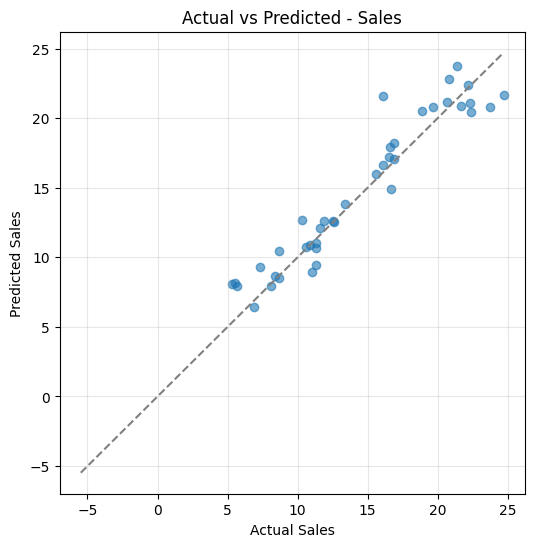

In [11]:
# 10) Plot
plt.figure(figsize=(6,6))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.6)
minv, maxv = min(results.min().min(), results.max().max()), max(results.min().min(), results.max().max())
plt.plot([minv, maxv], [minv, maxv], '--', color='gray')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted - Sales")
plt.grid(True, alpha=0.3)
plt.show()